In [1]:
## Challange 2.4.4
## Make Your Own Regression Model

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

In [18]:
#Loading The Data
df = pd.read_csv('2.4.4.csv')
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan


In [23]:
df = df.rename(index=str, columns={"Rape\r(revised\rdefinition)1": "Rape1", "Murder and\rnonnegligent\rmanslaughter": "Murder", "Rape\r(legacy\rdefinition)2": "Rape2", "Aggravated\rassault": "Aggravated Assault", "Property\rcrime": "Property Crime", "Arson3": "Arson", "Larceny-\rtheft": "Larceny", "Motor\rvehicle\rtheft": "Motor", "Violent\rcrime": "Violent Crime" })

In [24]:
df.dtypes

City                   object
Population             object
Violent Crime          object
Murder                float64
Rape1                 float64
Rape2                  object
Robbery                object
Aggravated Assault     object
Property Crime         object
Burglary               object
Larceny                object
Motor                  object
Arson                 float64
dtype: object

In [25]:
#Replacing the "," to nothing
def convert_number(number):
    try:
        converted = float(number.replace(',', ''))
    except:
        converted = number
    return converted

In [28]:
df.fillna(0)
df['Population'] = df['Population'].apply(lambda x: convert_number(x))
df['Murder'] = df['Murder'].apply(lambda x: convert_number(x))
df['Robbery'] = df['Robbery'].apply(lambda x: convert_number(x))
df['Property Crime'] = df['Property Crime'].apply(lambda x: convert_number(x))
df['Larceny'] = df['Larceny'].apply(lambda x: convert_number(x))

In [30]:
df.dtypes

City                   object
Population            float64
Violent Crime          object
Murder                float64
Rape1                 float64
Rape2                  object
Robbery               float64
Aggravated Assault     object
Property Crime        float64
Burglary               object
Larceny               float64
Motor                  object
Arson                 float64
dtype: object

In [31]:
df.head()

,City,Population,Violent Crime,Murder,Rape1,Rape2,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny,Motor,Arson
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10.000,0,0.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20.000,1,0.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15.000,0,0.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,3243.000,142,nan
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165.000,5,nan


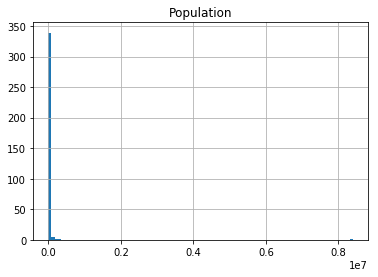

Median  7233.5
Std  450037.3675209857
Outliers above  907308.2350419714


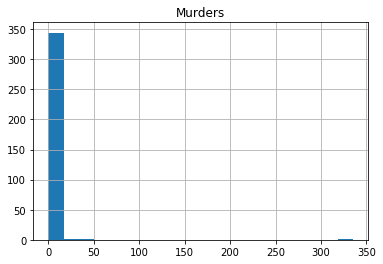

Median  7233.5
Std  18.303672792887784
Outliers above  7270.107345585776


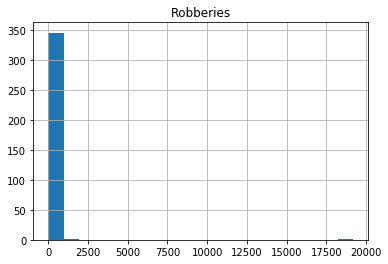

Median  1.0
Std  1031.032873295524
Outliers above  2063.065746591048


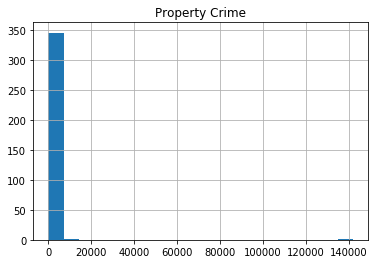

Median  112.5
Std  7659.724745633146
Outliers above  15431.949491266292


In [34]:
#Distributions of variables
df['Population'].hist(bins=100)
plt.title('Population')
plt.show()

#Median, standard deviation and the limit for outliers
median = df.Population.median()
std = df.Population.std()
pop_out = median + 2* std

print('Median ', median)
print('Std ', std)
print('Outliers above ', pop_out)

df['Murder'].hist(bins=20)
plt.title('Murders')
plt.show()

std = df['Murder'].std()
mur_out = median + 2* std

print('Median ', median)
print('Std ', std)
print('Outliers above ', mur_out)

df['Robbery'].hist(bins=20)
plt.title('Robberies')
plt.show()

median = df.Robbery.median()
std = df.Robbery.std()
rob_out = median + 2* std

print('Median ', median)
print('Std ', std)
print('Outliers above ', rob_out)

df['Property Crime'].hist(bins=20)
plt.title('Property Crime')
plt.show()

median = df['Property Crime'].median()
std = df['Property Crime'].std()
prop_out = median + 2* std

print('Median ', median)
print('Std ', std)
print('Outliers above ', prop_out)

In [36]:
# Remove Outliars
df['Population'] = df.Population.map(lambda x: x if x < pop_out else None)
df['Murder'] = df.Murder.map(lambda x: x if x < mur_out else None)
df['Robbery'] = df.Robbery.map(lambda x: x if x < rob_out else None)
df['Property\\ncrime'] = df['Property Crime'].map(lambda x: x if x < prop_out else None)

In [71]:
# Finding and removing highest values
print(df.Population.dropna().sort_values(ascending=False).head())
print(df['Murder'].dropna().sort_values(ascending=False).head())
print(df.Robbery.dropna().sort_values(ascending=False).head())
print(df['Property Crime'].dropna().sort_values(ascending=False).head())

35    258789.000
272   210562.000
346   199134.000
310   143834.000
7     118296.000
Name: Population, dtype: float64
216   335.000
35     47.000
272    42.000
310    21.000
140    10.000
Name: Murder, dtype: float64
35    1322.000
272    918.000
310    400.000
346    390.000
206    228.000
Name: Robbery, dtype: float64
216   141971.000
35     12491.000
272    10051.000
310     6473.000
3       4090.000
Name: Property Crime, dtype: float64


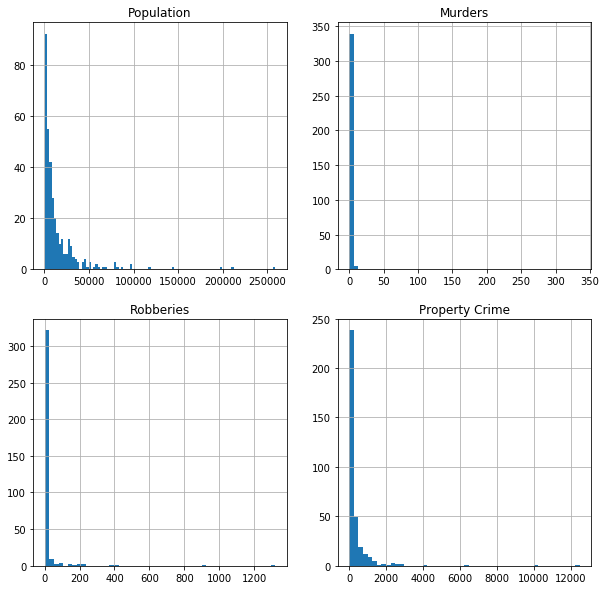

In [38]:
# Visual after removing outliars
plt.figure(figsize=(10,10))
plt.subplot(221)
df['Population'].hist(bins=100)
plt.title('Population')

plt.subplot(222)
df['Murder'].hist(bins=50)
plt.title('Murders')

plt.subplot(223)
df['Robbery'].hist(bins=50)
plt.title('Robberies')

plt.subplot(224)
df['Property\\ncrime'].hist(bins=50)
plt.title('Property Crime')

plt.show()

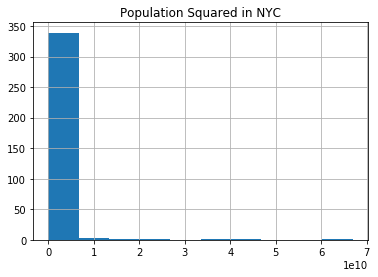

In [39]:
#Making a new feature. Population Squared
df['PopSq'] = df['Population']**2
df['PopSq'].hist()
plt.title('Population Squared in NYC')
plt.show()

In [40]:
#Defining categorical converting function

def convert_category(number):
    value = convert_number(number)

    if value>0:
        return 1
    else:
       return 0

In [41]:
#Converting "Murder" and "Robbery" to categorical

df['Murder_categorical'] = df['Murder'].apply(lambda x: convert_category(x))
df['Robbery_categorical'] = df['Robbery'].apply(lambda x: convert_category(x))
df.head()

,City,Population,Violent Crime,Murder,Rape1,Rape2,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny,Motor,Arson,Property\ncrime,PopSq,Murder_categorical,Robbery_categorical
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10.000,0,0.000,12.000,3463321.000,0,0
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20.000,1,0.000,24.000,6640929.000,0,0
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15.000,0,0.000,16.000,8099716.000,0,0
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,3243.000,142,nan,4090.000,9595377936.000,1,1
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165.000,5,nan,223.000,40806544.000,0,1


In [42]:
#Isolating features
features = df[['Population', 'PopSq', 'Murder_categorical', 'Robbery_categorical', 'Property Crime']].dropna()
features.head()

,Population,PopSq,Murder_categorical,Robbery_categorical,Property Crime
0,1861.000,3463321.000,0,0,12.000
1,2577.000,6640929.000,0,0,24.000
2,2846.000,8099716.000,0,0,16.000
3,97956.000,9595377936.000,1,1,4090.000
4,6388.000,40806544.000,0,1,223.000


In [43]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 0 to 347
Data columns (total 5 columns):
Population             347 non-null float64
PopSq                  347 non-null float64
Murder_categorical     347 non-null int64
Robbery_categorical    347 non-null int64
Property Crime         347 non-null float64
dtypes: float64(3), int64(2)
memory usage: 16.3+ KB


In [46]:
# Instantiate our model.
regr = linear_model.LinearRegression()
y = features['Property Crime']
x = features[['Population', 'PopSq', 'Murder_categorical', 'Robbery_categorical']]

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)
print(regr.score(x, y))

Coefficients:  [1.29510871e-02 1.14920528e-07 1.95038666e+02 9.28205845e+01]
Intercept:  -16.815866321663805
0.8444937611173492


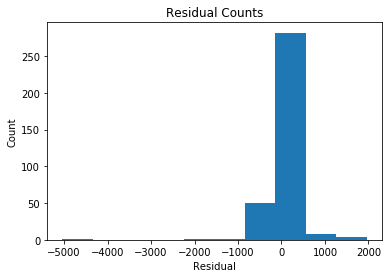

In [48]:
# Extract predicted values.
predicted = regr.predict(x).ravel()
actual = features['Property Crime']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Residual Counts')
plt.show()

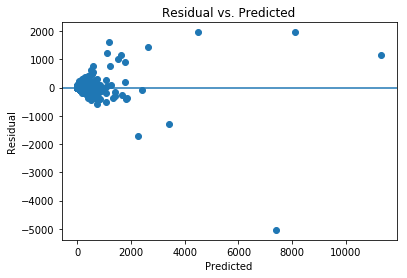

In [49]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [50]:
#Correlation Matrix\n",
correlation_matrix = x.corr()
display(correlation_matrix)

,Population,PopSq,Murder_categorical,Robbery_categorical
Population,1.000,0.889,0.503,0.344
PopSq,0.889,1.000,0.345,0.152
Murder_categorical,0.503,0.345,1.000,0.311
Robbery_categorical,0.344,0.152,0.311,1.000


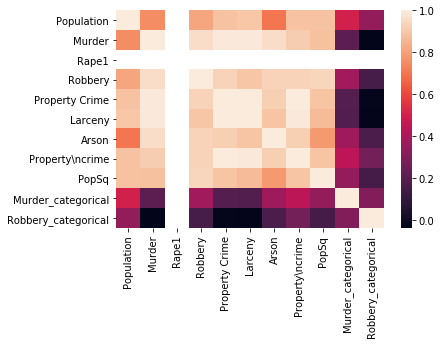

In [51]:
sns.heatmap(df.corr())

In [ ]:
#PCA

In [52]:
#Features data
x_data = x
x_data.head(5)

,Population,PopSq,Murder_categorical,Robbery_categorical
0,1861.000,3463321.000,0,0
1,2577.000,6640929.000,0,0
2,2846.000,8099716.000,0,0
3,97956.000,9595377936.000,1,1
4,6388.000,40806544.000,0,1


In [53]:
#Features shape
x_data.shape

(347, 4)

In [54]:
#Target data
y_target = y
y_target.head(5)

0     12.000
1     24.000
2     16.000
3   4090.000
4    223.000
Name: Property Crime, dtype: float64

In [55]:
#Target shape
y_target.shape

(347,)

In [56]:
from sklearn.model_selection import train_test_split

# train/test data

train_data, test_data, train_target, test_target = train_test_split(
    x_data, y_target, test_size=0.20, random_state=0)

#Scaling data
scaler = StandardScaler()

#Fit on training set only
scaler.fit(train_data)

#Applying transform to both the training and test set
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [57]:
#PCA
pca = PCA(n_components=2)

In [58]:
#Fitting PCA to training set only
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [59]:
#Applying mapping transfer to both training and test sets
train_data = pca.transform(train_data)
test_data = pca.transform(test_data)

In [60]:
#Instantiate our model
regr = linear_model.LinearRegression()

In [61]:
# Fit our model to our data. It's learning the relationship between the data and the target
regr.fit(train_data, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
#Display the attributes we calculated.
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)
print(regr.score(train_data, train_target))

Coefficients:  [537.87122408 272.6870899 ]
Intercept:  371.72563176895306
0.8086515156212409


In [65]:
# Predict for One Observation
regr.predict(test_data)

array([ 4.72309230e+01,  1.52875259e+03,  1.73805773e+03,  6.12689273e+01,
        5.71028544e+01,  4.67221444e+01,  5.95375815e+02,  3.57973808e+02,
        2.32376621e+01,  6.60994170e+01,  9.43977434e+01,  3.26234755e+02,
        4.83743914e+01,  1.73639241e+02,  6.74647863e+01,  1.33010171e+02,
        1.56800499e+02,  6.19320280e+01,  2.29250799e+02,  2.04829964e+02,
        4.64639170e+01,  8.72705839e+01,  6.53197170e+02,  6.60186291e+01,
        4.58224621e+01,  5.57747263e+01,  2.79615206e+01,  3.69242163e+02,
        6.39428930e+01,  3.53014837e+02, -1.98964369e+00,  1.13713209e+02,
        1.45678615e+02,  4.64795659e+01,  1.47850869e+02,  2.25613507e+02,
        3.91440151e+01,  7.16005866e+01,  2.73718439e+02,  6.71312617e+01,
        6.38459486e+01,  1.13376948e+02,  4.68082346e+01,  9.88065980e+01,
        2.42582589e+02,  5.76067242e+01,  1.99441515e+02,  9.27263231e+02,
        1.42732565e+02,  7.48355075e+03,  4.32082585e+01,  1.38962991e+02,
        3.38995611e+03,  

In [66]:
# Measuring model performance
regr.score(test_data, test_target)

0.8901468228202812

In [67]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, test_data, test_target, cv=5)
print(scores)

[ 0.83323789 -0.09101579  0.68563463  0.9227652   0.80984435]


In [70]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.74)
